In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

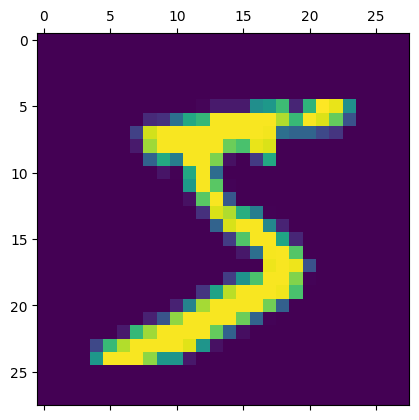

In [9]:
# len(X_train)
# X_train.shape
plt.matshow(X_train[0])

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

2022-10-16 19:46:16.090236: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4685 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9251


In [19]:
model.evaluate(X_test_flattened,y_test)

2022-10-16 19:48:10.267541: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.2712 - accuracy: 0.9251


[0.2712492346763611, 0.9251000285148621]

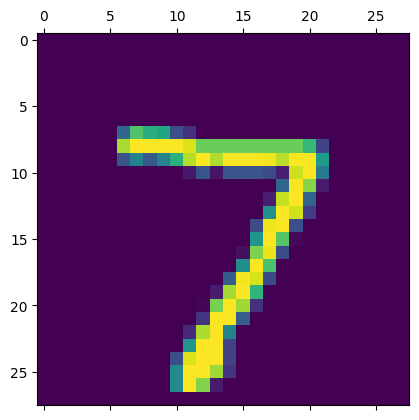

In [20]:
plt.matshow(X_test[0])

In [23]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [27]:
np.argmax(y_pred[0])

7

In [28]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    1,    0,    4,    5,    4,    1,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   9,   13,  906,   18,    8,    4,   13,   11,   47,    3],
       [   4,    0,   14,  917,    1,   27,    3,   10,   26,    8],
       [   1,    2,    2,    1,  920,    0,   14,    3,    8,   31],
       [  14,    3,    2,   22,   10,  779,   18,    7,   29,    8],
       [  13,    3,    4,    1,    7,   13,  914,    2,    1,    0],
       [   2,   12,   18,    6,    8,    1,    0,  944,    2,   35],
       [  11,    7,    5,   21,    9,   25,   10,   12,  868,    6],
       [  11,    7,    1,   10,   28,    7,    0,   19,    5,  921]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

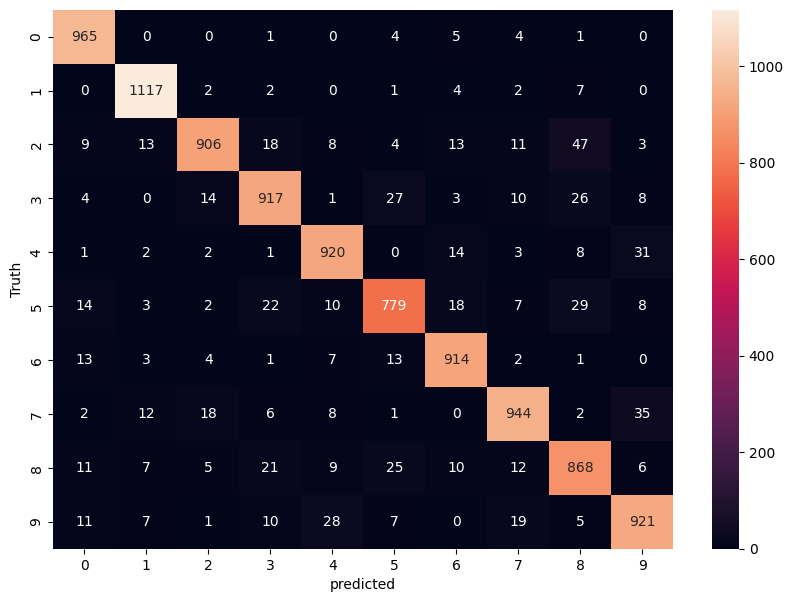

In [31]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2698 - accuracy: 0.9239
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1203 - accuracy: 0.9655
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9755
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9804
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9882
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9892


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9778


[0.07211275398731232, 0.9778000116348267]

In [35]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

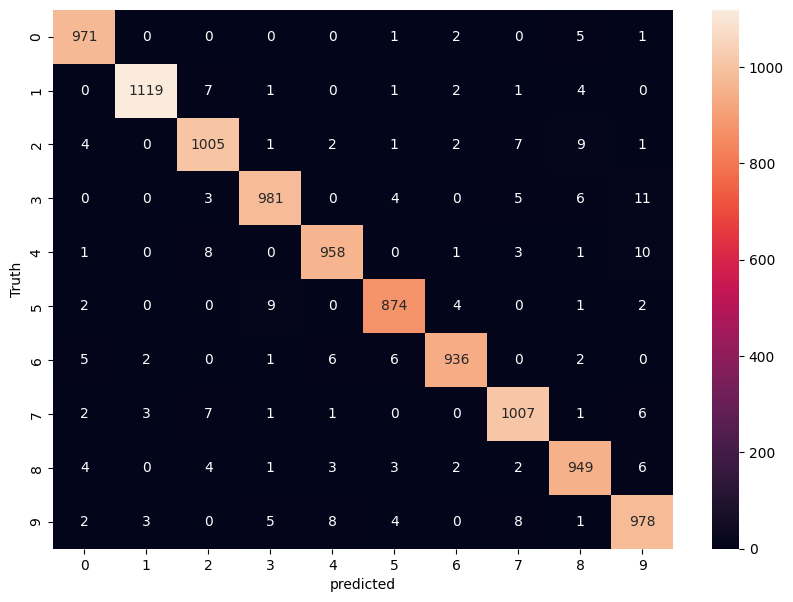

In [36]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='selu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)
model.fit(X_train,y_train, epochs=1)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2400 - sparse_categorical_accuracy: 0.9285
